In [282]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [283]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [284]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [285]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [286]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)

In [287]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])

In [288]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [289]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

In [290]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

## Домашнее задание <a class='anchor' id='hw'>

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

In [291]:
alpha_list = [1e-10, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10]
coeffs = np.zeros((len(alpha_list), X_st.shape[1]))

In [292]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        

    
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W


In [293]:
for i in range(len(alpha_list)):
    coeffs[i,:] = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=alpha_list[i])
    

Final MSE: 24.904618876908383
Final MSE: 24.904618964619765
Final MSE: 24.904627646688823
Final MSE: 24.90549450305077
Final MSE: 24.990877722019317
Final MSE: 32.53248822789761
Final MSE: 385.46327882920286
Final MSE: 1688.7042658257644
Final MSE: 2302.3365023435517


In [294]:
coeffs

array([[56.5       ,  6.30309349, -0.35638885,  6.57147642],
       [56.4997175 ,  6.30301871, -0.35618766,  6.57131844],
       [56.49717514,  6.30234588, -0.35437787,  6.5698973 ],
       [56.47176412,  6.29563963, -0.33636842,  6.55575571],
       [56.21890547,  6.23069221, -0.16470894,  6.42099175],
       [53.80952381,  5.73058923,  0.98368247,  5.51609991],
       [37.66666667,  4.01145689,  2.67324854,  3.68757438],
       [16.14285714,  2.20254737,  1.94476797,  2.14020792],
       [ 9.41666667,  1.44984507,  1.33835494,  1.42938586]])

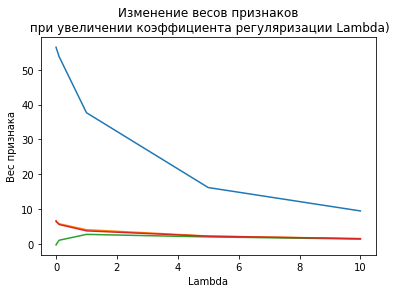

In [295]:
for i in range(coeffs.shape[1]):
    plt.plot(alpha_list, coeffs[:,i])

    
plt.title('Изменение весов признаков\n при увеличении коэффициента регуляризации Lambda)')
plt.xlabel('Lambda')
plt.ylabel('Вес признака');

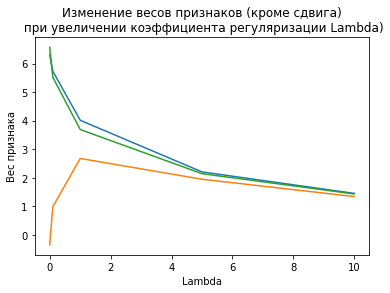

In [296]:
for i in range(1,coeffs.shape[1]):
    plt.plot(alpha_list, coeffs[:,i])

    
plt.title('Изменение весов признаков (кроме сдвига)\n при увеличении коэффициента регуляризации Lambda)')
plt.xlabel('Lambda')
plt.ylabel('Вес признака');

**Вывод:** чем больше коэфф.регуляризации, тем меньше весов модель даёт признакам, т.к. слишком высокий штраф накладываем

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$
Про производную можно посмотреть [здесь](https://youtu.be/dHhYHGI9E6I).

In [297]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * (W / abs(W)) # градиент регуляризации - производная от сложной ф-ции с модулем; reg - коэфф, скобки - производная от модуля
        
        W -= eta * (dQ + dReg)
        

    
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [298]:
gradient_descent_reg_l1(X_st, y, iterations=300, eta=1e-1, reg=1e-4)

Iter: 0, weights: [11.64422369  2.20487465  1.78255109  2.38291308], error 3305.7832267044405
Iter: 30, weights: [56.4444213   5.659142    1.72814133  5.0530098 ], error 25.678683040312222
Iter: 60, weights: [56.49988126  6.0421788   0.73932442  5.6993716 ], error 25.120931147359567
Iter: 90, weights: [56.49994991  6.1762947   0.22943171  6.0930818 ], error 24.967192838494178
Iter: 120, weights: [ 5.64999500e+01  6.23696789e+00 -4.14909665e-02  6.31239843e+00], error 24.92277140550915
Iter: 150, weights: [56.49995     6.2677173  -0.18661719  6.43153006], error 24.90990067866411
Iter: 180, weights: [56.49995     6.28399991 -0.26469344  6.49586891], error 24.906159781192915
Iter: 210, weights: [56.49995     6.29272503 -0.30673055  6.53054932], error 24.905070603717302
Iter: 240, weights: [56.49995     6.29741716 -0.32936908  6.54923234], error 24.904752488783465
Iter: 270, weights: [56.49995     6.29994316 -0.34156162  6.55929555], error 24.904659042966898
Final MSE: 24.904631307588836


array([56.49995   ,  6.30127037, -0.34796859,  6.56458375])

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

**??? Затрудняюсь ответить**

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [299]:
X, y, coeff = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2,
                                       n_targets=1, noise=5, coef=True,random_state=26)

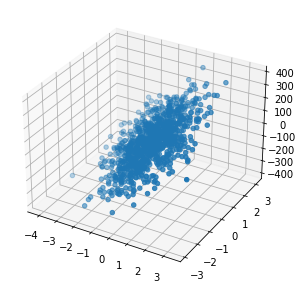

In [300]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y);

In [301]:
w = np.zeros(X.shape[1])
w_list = [w.copy()]
err = []
eta = 0.01
max_iter = 200
min_weight_diff = 1e-3
weight_diff = np.inf
iteration = 0
np.random.seed(26)
while iteration < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2/y.shape[0]*np.dot(X.T, y_pred-y)
    new_w = w - eta*dQ
    weight_diff = np.linalg.norm(new_w - w, ord=2)
    error = calc_mse(X.dot(new_w), y)
    w_list.append(new_w.copy())
    err.append(error)
    if iteration%25 == 0:
        print(f'Iter {iteration}: error - {error}, weights: {new_w}')
    
    iteration +=1
    w = new_w
print(f'Iter {iteration}: error - {error}, weights: {new_w}')

Iter 0: error - 13552.00369367245, weights: [1.5381414  1.73668483]
Iter 25: error - 5195.8409218128345, weights: [30.89308363 36.47607185]
Iter 50: error - 2017.6811455580075, weights: [47.96762161 58.73408088]
Iter 75: error - 798.5324839032286, weights: [57.91277136 72.98359878]
Iter 100: error - 327.24214781892255, weights: [63.71389802 82.09956266]
Iter 125: error - 143.80004704294802, weights: [67.10309872 87.92767278]
Iter 150: error - 71.96753184943684, weights: [69.08650789 91.65163896]
Iter 175: error - 43.692345164468, weights: [70.24930542 94.02991966]
Iter 200: error - 32.78954299518882, weights: [70.91137357 95.49955851]


In [302]:
w = np.zeros(X.shape[1])
w_list_s = [w.copy()]
err_s = []
eta = 0.01
max_iter = 200
min_weight_diff = 1e-3
weight_diff = np.inf
iteration = 0
np.random.seed(26)
while iteration < max_iter:
    ind = np.random.randint(X.shape[0], size=1)
    y_pred = np.dot(X[ind], w)
    dQ = 2/y[ind].shape[0]*np.dot(X[ind].T, y_pred-y[ind])
    new_w = w - eta*dQ
    weight_diff = np.linalg.norm(new_w - w, ord=2)
    error = calc_mse(X.dot(new_w), y)
    w_list_s.append(new_w.copy())
    err_s.append(error)
    if iteration%25 == 0:
        print(f'Iter {iteration}: error - {error}, weights: {new_w}')
    
    iteration +=1
    w = new_w
print(f'Iter {iteration}: error - {error}, weights: {new_w}')

Iter 0: error - 13340.94267552389, weights: [1.37236786 3.13051122]
Iter 25: error - 4310.497145554289, weights: [30.51084376 45.55987074]
Iter 50: error - 1683.0957864276631, weights: [46.94388743 64.73987879]
Iter 75: error - 599.9745944952483, weights: [57.47192934 78.27546188]
Iter 100: error - 263.61541747872053, weights: [62.65843335 85.33432791]
Iter 125: error - 126.8264285971492, weights: [65.67391075 89.9819171 ]
Iter 150: error - 89.91871848323206, weights: [66.55970114 92.01264143]
Iter 175: error - 60.74611103140257, weights: [68.06281846 93.49759051]
Iter 200: error - 37.42611956088042, weights: [70.62161283 94.78194346]


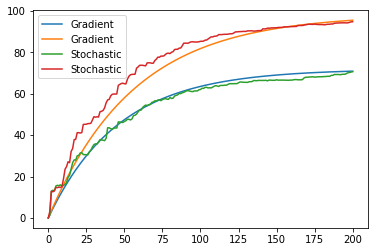

In [303]:
plt.figure(1)
plt.plot(w_list, label='Gradient')

plt.plot(w_list_s, label = 'Stochastic')
plt.legend();

Проект*: 
1. https://www.kaggle.com/c/gb-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/gb-choose-tutors классификация

## Литература

1. [Стохастический градиентный спуск](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)
2. [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
3. [numpy.mean](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html)
4. [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
5. [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
6. [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
7. [Переобучение и Недообучение. Видео](https://youtu.be/m7P7bnLxIc4)